In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [2]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [3]:
Boston=load_data('Boston')

In [4]:
Boston.iloc[200:210]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,4.45,32.9
201,0.03445,82.5,2.03,0,0.4150,6.162,38.4,6.2700,2,348,14.7,7.43,24.1
202,0.02177,82.5,2.03,0,0.4150,7.610,15.7,6.2700,2,348,14.7,3.11,42.3
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
205,0.13642,0.0,10.59,0,0.4890,5.891,22.3,3.9454,4,277,18.6,10.87,22.6
206,0.22969,0.0,10.59,0,0.4890,6.326,52.5,4.3549,4,277,18.6,10.97,24.4
207,0.25199,0.0,10.59,0,0.4890,5.783,72.7,4.3549,4,277,18.6,18.06,22.5
208,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,14.66,24.4
209,0.43571,0.0,10.59,1,0.4890,5.344,100.0,3.8750,4,277,18.6,23.09,20.0


In [5]:
#[medv (median house value)]rmvar (average number of rooms perhouse),
#age (proportion of owner-occupied units built prior to 1940), and
#lstat (percent of households with low socioeconomic status)

In [6]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [7]:
x=Boston[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'lstat']]

In [8]:
y=Boston['medv']

In [9]:
Boston['zn'].nunique()

26

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm=LinearRegression()

In [14]:
lm.fit(x_train,y_train)

LinearRegression()

In [15]:
print(lm.intercept_)

36.448952112022596


In [16]:
coeff= pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff

,Coefficient
crim,-0.150528
zn,0.027125
indus,-0.010486
nox,-16.349396
rm,4.062762
age,-0.006804
dis,-1.403008
rad,0.103409
ptratio,-0.956901
lstat,-0.597877


In [17]:
predictions=lm.predict(x_test)

In [18]:
re=(y_test-predictions)
re.argmax()

96

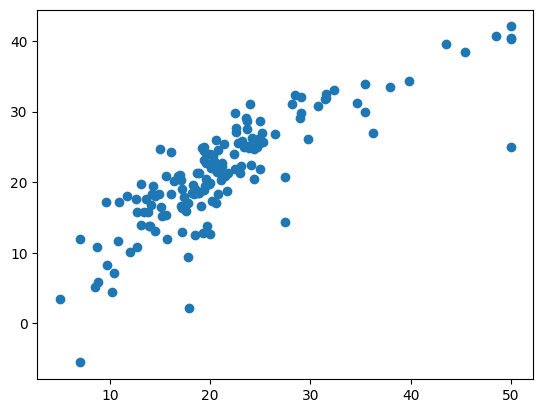

In [19]:
plt.scatter(y_test,predictions)

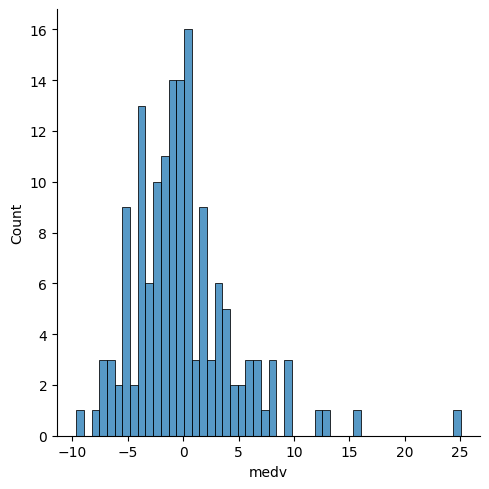

In [20]:
sns.displot((y_test-predictions), bins=50)

In [21]:
from sklearn import metrics

In [22]:
MSE=metrics.mean_squared_error(y_test,predictions)
MSE

22.220379814192363

In [23]:
MAE=metrics.mean_absolute_error(y_test,predictions)
MAE

3.3258011247441175

In [24]:
RSME=metrics.root_mean_squared_error(y_test,predictions)
RSME

4.713849786977981

In [25]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


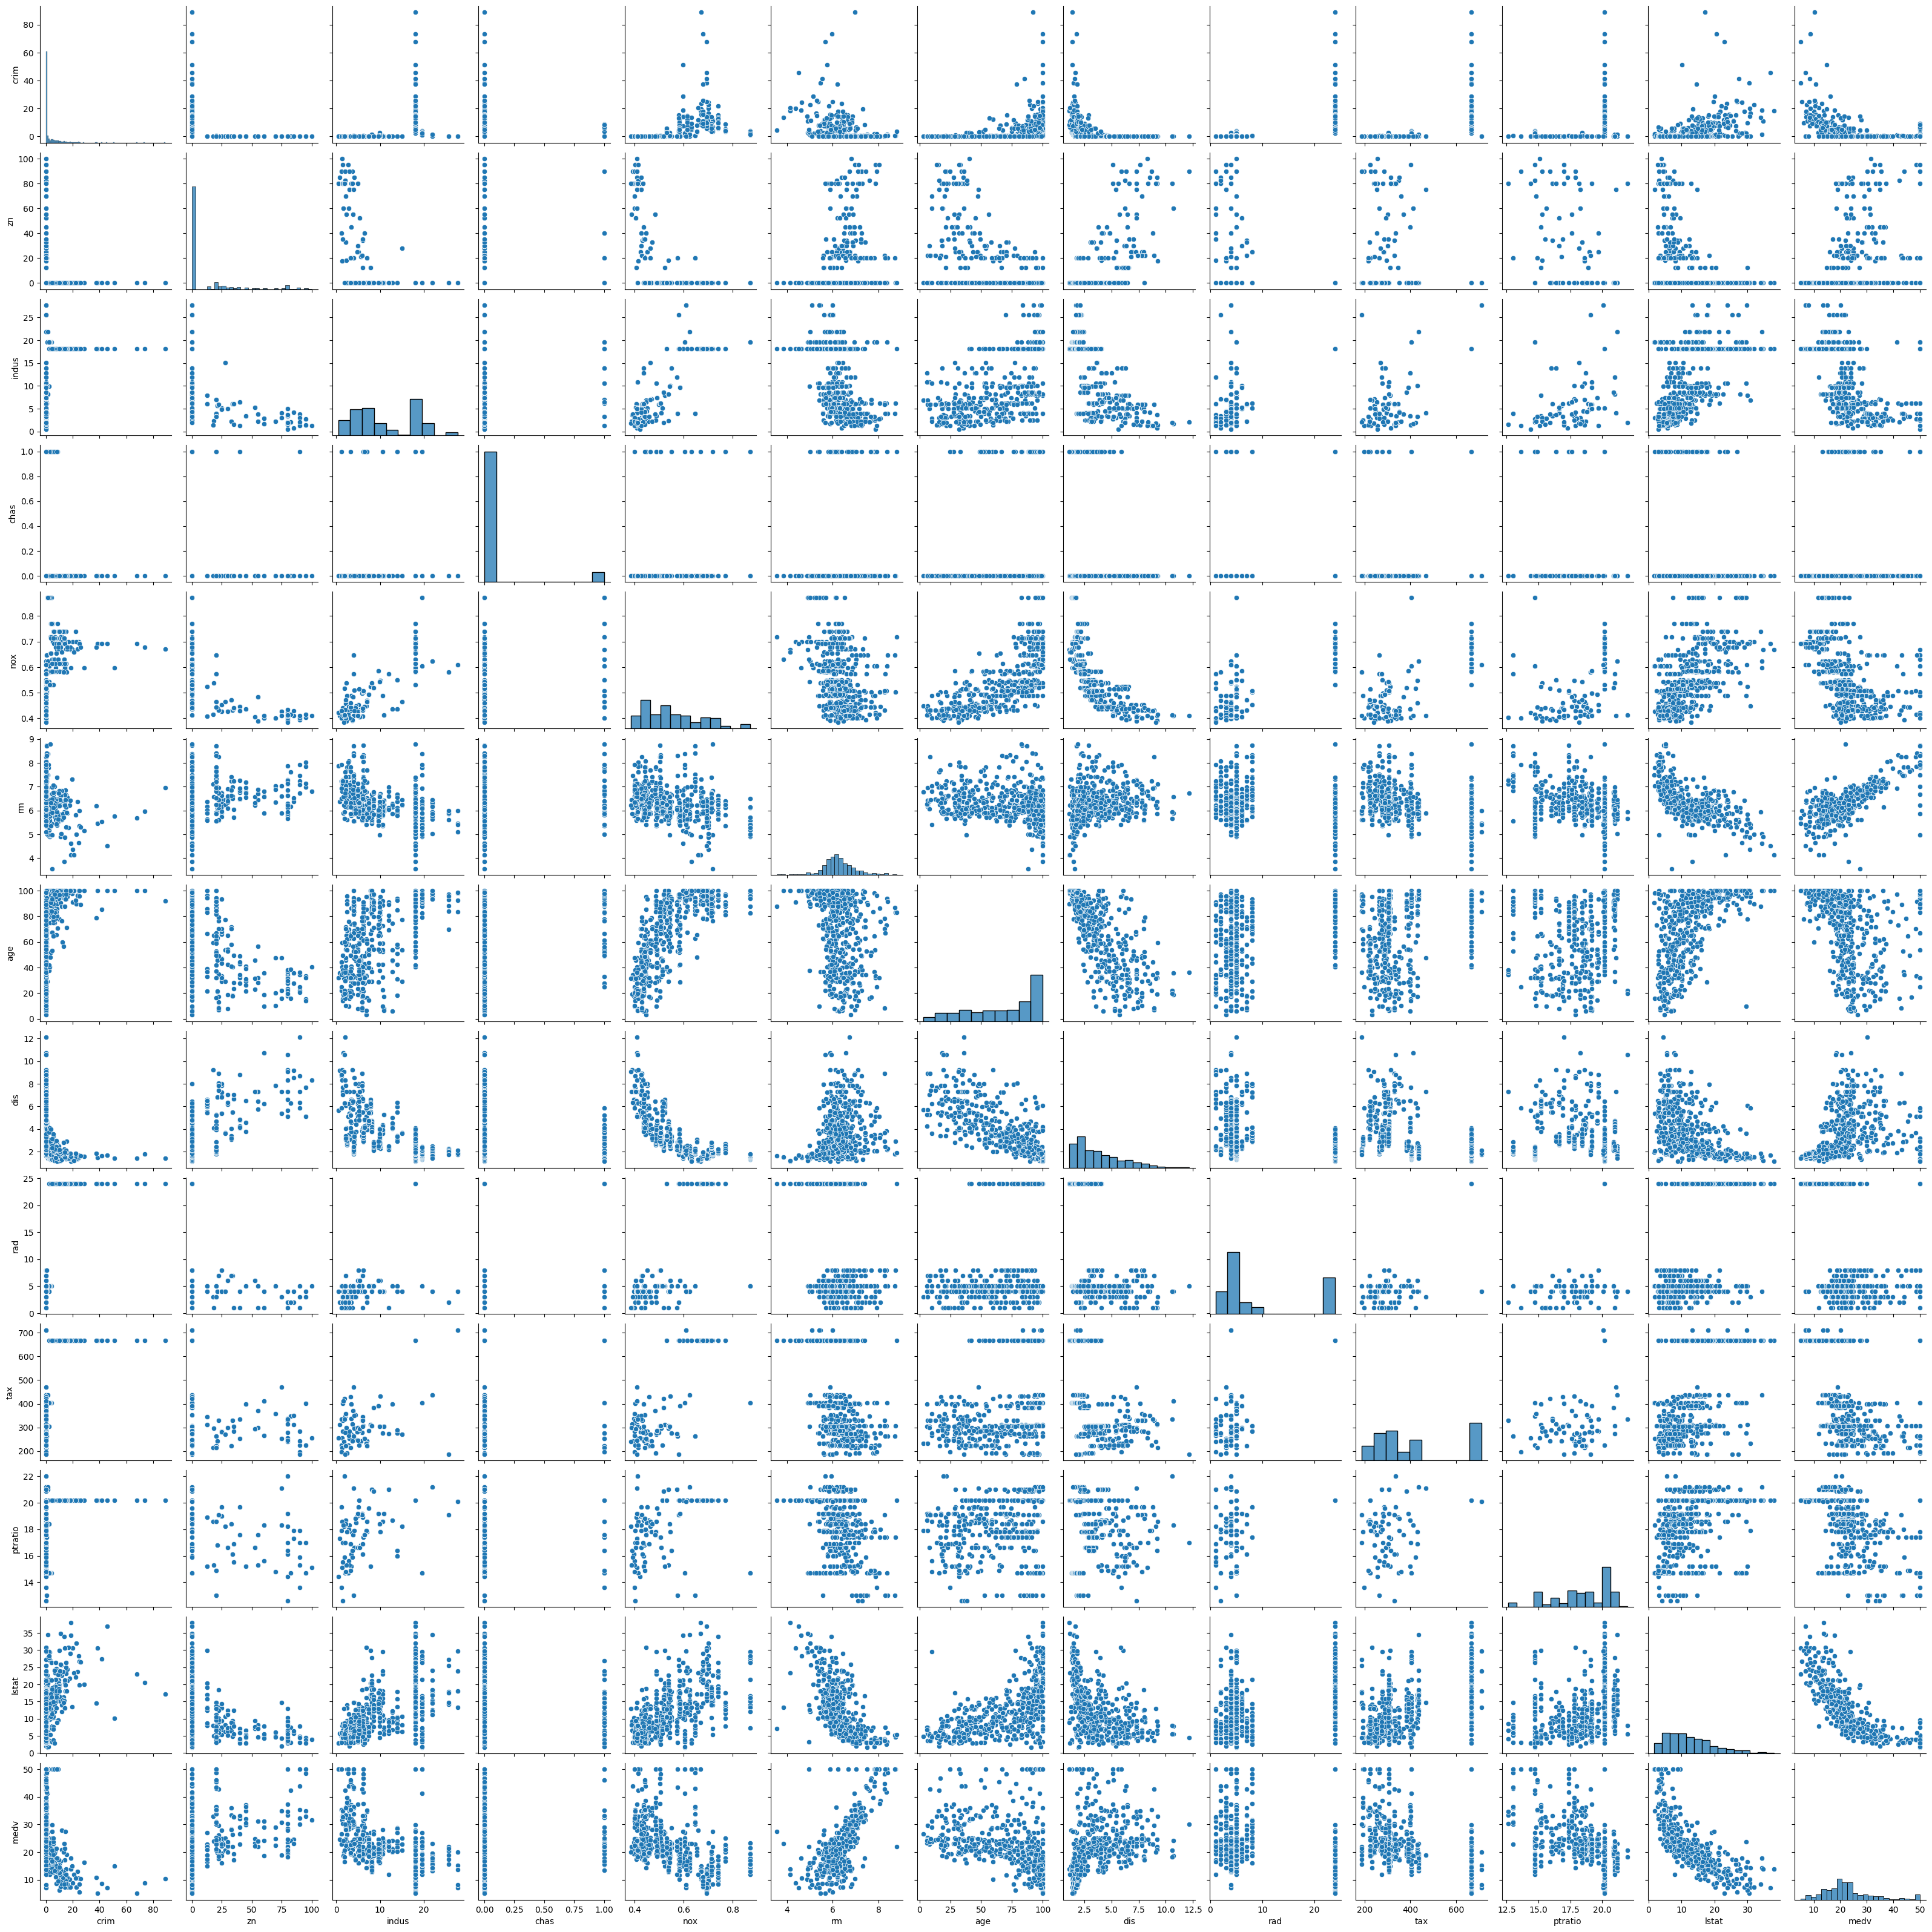

In [26]:
sns.pairplot(Boston)

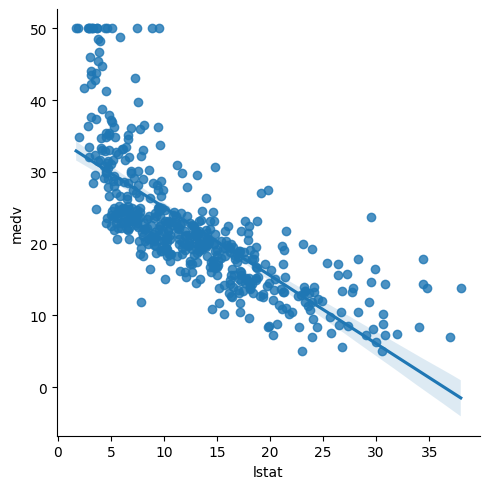

In [27]:
sns.lmplot(data=Boston, x='lstat', y='medv')